# Deal with Imbalanced Classes Problem

Imbalanced classes are a common problem in machine learning classification where there are an unbalanced ratio of observations in each class. Class imbalance can be found in many different areas including medical diagnosis, spam filtering, and fraud detection.

In this guide, we'll look at 3 possible ways to handle an imbalanced class problem using credit card data. Our objective will be to correctly classify the minority class of fraudulent transactions.

<img src='https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png'>

## Table of contents
1. Imbalanced classess detection
2. Upsampling or Oversampling Minority Class
3. Downsampling or Undersampling Majority Class
4. Generate Synthetic Samples with SMOTE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('../dastasets/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,26319,1.251094,-0.619682,1.421619,0.495537,-1.721549,-0.296483,-1.207151,0.135690,-0.181842,...,-0.114985,0.125850,0.014034,0.315620,0.218096,-0.249817,0.093594,0.047930,20.00,0
14995,26319,1.139049,0.078237,0.480345,0.471539,-0.271098,-0.195209,-0.108635,0.087148,-0.189344,...,-0.169569,-0.544291,0.139743,0.007989,0.101150,0.105698,-0.021173,0.008139,19.99,0
14996,26322,1.297527,0.290501,-0.157129,0.300362,0.275047,-0.075184,-0.028201,0.006493,-0.178580,...,-0.310852,-0.915030,-0.029196,-0.872330,0.349254,0.148786,-0.026891,0.009091,0.89,0
14997,26322,1.245674,0.166975,0.488306,0.635322,-0.562777,-1.011073,0.014953,-0.160211,0.170362,...,-0.262581,-0.816264,0.140304,0.357827,0.186423,0.096544,-0.035866,0.018495,8.99,0


## 1) Imbalanced classess detection

In [3]:
df['Class'].value_counts()

0    14938
1       61
Name: Class, dtype: int64

In [4]:
df['Class'].value_counts() * 100 / len(df)

0    99.593306
1     0.406694
Name: Class, dtype: float64

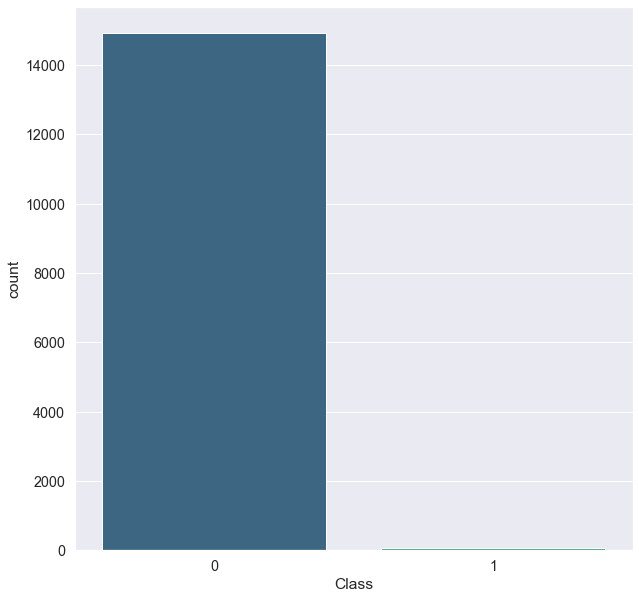

In [5]:
sns.countplot(x='Class', data=df, palette='viridis')

## 2) Upsampling or Oversampling Minority Class

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with. A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

**Important Note**<br>
Always split into test and train sets BEFORE trying any resampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets! This can allow our model to simply memorize specific data points and cause overfitting.

In [8]:
from sklearn.model_selection import train_test_split

x = df.drop('Class', axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [9]:
training_data = pd.concat([x_train, y_train], axis=1)
training_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3114,2682,-0.924329,1.247434,1.355228,0.650625,0.221878,0.128306,1.076492,-0.441472,0.185733,...,0.014613,0.187315,-0.215294,0.103253,0.153443,-0.459777,-0.899810,-0.195048,40.10,0
184,121,-0.868565,0.684978,2.013745,0.126390,-0.493158,-0.320478,0.373577,-0.080501,0.900231,...,0.027273,0.573843,-0.252014,0.431533,-0.137521,0.423221,0.180521,0.044404,29.99,0
14746,25978,-0.317579,0.060677,1.062907,-0.543968,-0.199388,-0.973206,0.091980,-0.154574,-1.361693,...,0.097617,0.204642,0.062376,0.285232,-0.405641,-0.307435,0.163547,0.190453,45.87,0
2945,2493,-0.997149,0.815692,1.870218,-0.020124,0.604453,-0.056641,0.819395,0.173149,-0.986915,...,0.232832,0.522494,-0.311808,0.024606,0.608281,-0.358201,0.031691,0.055267,34.90,0
9005,12496,1.166873,-0.391233,1.099740,0.299399,-1.046431,0.018657,-0.960134,0.188688,2.182781,...,-0.054159,0.094817,-0.068511,0.006558,0.145078,1.075447,-0.080268,-0.004308,27.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,4349,1.217258,0.429244,0.423245,0.845540,-0.098761,-0.553146,-0.075999,-0.152716,1.294920,...,-0.409357,-0.891313,0.169566,-0.023717,0.124566,0.085156,-0.032414,0.021179,1.29,0
14879,26159,0.948754,-0.829076,0.844771,0.184600,-1.199209,0.013100,-0.690474,0.214978,0.822239,...,0.168743,0.257425,-0.183911,0.071903,0.140817,1.101353,-0.071775,0.022260,139.00,0
3912,3494,-0.998788,1.003816,1.762017,-0.424237,0.412140,-1.115448,0.814345,-0.144202,-0.569682,...,-0.220118,-0.798683,-0.193344,0.334209,0.218955,-0.005643,-0.137592,0.086925,4.99,0
3768,3265,-0.968115,0.836638,1.833720,1.235145,0.001276,0.339720,0.497400,0.205294,-0.470866,...,0.021660,0.125291,-0.273622,0.203862,0.326570,-0.179649,-0.159637,0.080838,35.76,0


In [10]:
from sklearn.utils import resample

not_fraud = training_data[training_data['Class'] == 0]
fraud = training_data[training_data['Class'] == 1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled['Class'].value_counts()

1    11207
0    11207
Name: Class, dtype: int64

In [11]:
x_train = upsampled.drop('Class', axis=1)
y_train = upsampled['Class']

In [12]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
3114,2682,-0.924329,1.247434,1.355228,0.650625,0.221878,0.128306,1.076492,-0.441472,0.185733,...,-0.157886,0.014613,0.187315,-0.215294,0.103253,0.153443,-0.459777,-0.899810,-0.195048,40.10
184,121,-0.868565,0.684978,2.013745,0.126390,-0.493158,-0.320478,0.373577,-0.080501,0.900231,...,0.177090,0.027273,0.573843,-0.252014,0.431533,-0.137521,0.423221,0.180521,0.044404,29.99
14746,25978,-0.317579,0.060677,1.062907,-0.543968,-0.199388,-0.973206,0.091980,-0.154574,-1.361693,...,0.423890,0.097617,0.204642,0.062376,0.285232,-0.405641,-0.307435,0.163547,0.190453,45.87
2945,2493,-0.997149,0.815692,1.870218,-0.020124,0.604453,-0.056641,0.819395,0.173149,-0.986915,...,-0.033178,0.232832,0.522494,-0.311808,0.024606,0.608281,-0.358201,0.031691,0.055267,34.90
9005,12496,1.166873,-0.391233,1.099740,0.299399,-1.046431,0.018657,-0.960134,0.188688,2.182781,...,-0.137603,-0.054159,0.094817,-0.068511,0.006558,0.145078,1.075447,-0.080268,-0.004308,27.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,8878,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00
6899,8878,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00
10801,18399,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
9179,13126,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,...,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00


## 3) Downsampling or Undersampling Majority Class

Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

We will again use the resampling module from Scikit-Learn to randomly remove samples from the majority class.

In [13]:
training_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3114,2682,-0.924329,1.247434,1.355228,0.650625,0.221878,0.128306,1.076492,-0.441472,0.185733,...,0.014613,0.187315,-0.215294,0.103253,0.153443,-0.459777,-0.899810,-0.195048,40.10,0
184,121,-0.868565,0.684978,2.013745,0.126390,-0.493158,-0.320478,0.373577,-0.080501,0.900231,...,0.027273,0.573843,-0.252014,0.431533,-0.137521,0.423221,0.180521,0.044404,29.99,0
14746,25978,-0.317579,0.060677,1.062907,-0.543968,-0.199388,-0.973206,0.091980,-0.154574,-1.361693,...,0.097617,0.204642,0.062376,0.285232,-0.405641,-0.307435,0.163547,0.190453,45.87,0
2945,2493,-0.997149,0.815692,1.870218,-0.020124,0.604453,-0.056641,0.819395,0.173149,-0.986915,...,0.232832,0.522494,-0.311808,0.024606,0.608281,-0.358201,0.031691,0.055267,34.90,0
9005,12496,1.166873,-0.391233,1.099740,0.299399,-1.046431,0.018657,-0.960134,0.188688,2.182781,...,-0.054159,0.094817,-0.068511,0.006558,0.145078,1.075447,-0.080268,-0.004308,27.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,4349,1.217258,0.429244,0.423245,0.845540,-0.098761,-0.553146,-0.075999,-0.152716,1.294920,...,-0.409357,-0.891313,0.169566,-0.023717,0.124566,0.085156,-0.032414,0.021179,1.29,0
14879,26159,0.948754,-0.829076,0.844771,0.184600,-1.199209,0.013100,-0.690474,0.214978,0.822239,...,0.168743,0.257425,-0.183911,0.071903,0.140817,1.101353,-0.071775,0.022260,139.00,0
3912,3494,-0.998788,1.003816,1.762017,-0.424237,0.412140,-1.115448,0.814345,-0.144202,-0.569682,...,-0.220118,-0.798683,-0.193344,0.334209,0.218955,-0.005643,-0.137592,0.086925,4.99,0
3768,3265,-0.968115,0.836638,1.833720,1.235145,0.001276,0.339720,0.497400,0.205294,-0.470866,...,0.021660,0.125291,-0.273622,0.203862,0.326570,-0.179649,-0.159637,0.080838,35.76,0


In [14]:
not_fraud = training_data[training_data['Class'] == 0]
fraud = training_data[training_data['Class'] == 1]

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled['Class'].value_counts()

1    42
0    42
Name: Class, dtype: int64

In [15]:
x_train = downsampled.drop('Class', axis=1)
y_train = downsampled['Class']
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7512,10257,-1.776801,1.287355,1.775423,-1.226009,-0.177330,-1.198360,0.929934,-0.733939,2.419797,...,0.293686,-0.392348,-0.318825,0.033453,0.674124,-0.323569,0.573119,-0.313521,-0.001384,20.00
2625,2153,-2.057805,1.934610,0.707218,0.727363,0.097361,0.555200,0.758649,0.070970,1.053698,...,0.843197,-0.337637,0.224921,-0.137991,-0.319418,0.169424,-0.280305,0.332814,-0.137961,31.90
1339,1046,-1.792545,0.068441,0.802953,-0.541977,0.822320,-0.873966,0.203552,0.126643,0.202998,...,0.048166,-0.218152,-0.560770,-0.223479,-0.396234,-0.115364,0.285137,-0.285946,-0.024595,1.00
13865,24621,1.189177,1.326079,-1.350444,1.789585,0.822407,-1.587817,0.553731,-0.305335,0.640265,...,-0.103374,-0.300358,-0.583629,-0.179657,0.136002,0.759361,-0.361459,0.006011,0.081721,3.05
1356,1054,-0.819410,0.599214,2.171505,2.225926,0.871884,1.581465,-0.072613,0.624037,-1.251713,...,0.049014,0.418878,1.232204,0.152597,-0.622317,-0.753108,0.175683,0.215977,0.161463,30.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11343,19762,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,...,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1.00
6529,7891,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,0.315957,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.00
11710,20011,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,...,0.996469,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1.00
6719,8415,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,...,0.632710,0.536892,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1.00


## 4) Generate Synthetic Samples with SMOTE

<img src='https://miro.medium.com/max/1968/1*Uix18ehXJDGOX4Iu7vrdnQ.png'>

SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.

**to install `imbalanced-learn` use this command**

`conda install -c conda-forge imbalanced-learn`

In [16]:
from imblearn.over_sampling import SMOTE

x = df.drop('Class', axis=1)
y = df['Class']

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [17]:
y_train.value_counts()

1    11207
0    11207
Name: Class, dtype: int64

# Great Work!